In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# df = pd.read_pickle("../comparison/results_s_curve_20_5.pkl")
# df2 = pd.read_pickle("../comparison/results_s_curve_20_5_2.pkl")
# df = pd.concat([df, df2])
# df = df.reset_index(drop=True)
# df.to_pickle("../comparison/results_s_curve_20_5_0.0.1.pkl")

In [3]:
df = pd.read_pickle("../comparison/results_s_curve_20_5_0.0.1.pkl")

In [4]:
df

,Method,Seed,# distributions,SpearmanR,P@1,P@5,P@10,P@25,10-NN time (s),All-pairs time(s)
0,DiffusionEMD,0,50,0.783426,0.300,0.456,0.5900,0.7944,0.105005,0.116903
1,PhEMD,0,50,0.592484,0.080,0.372,0.4560,0.6968,1.313969,1.313969
2,Exact,0,50,1.000000,1.000,1.000,1.0000,1.0000,3.269327,3.269327
3,Sinkhorn,0,50,0.927787,0.640,0.644,0.7440,0.8904,4.009277,4.009277
4,Mean,0,50,0.796105,0.160,0.416,0.5960,0.8008,0.075013,0.075013
...,...,...,...,...,...,...,...,...,...,...
175,PhEMD,4,200,0.655875,0.050,0.177,0.2550,0.3998,13.902424,13.902424
176,Exact,4,200,1.000000,1.000,1.000,1.0000,1.0000,49.871269,49.871269
177,Sinkhorn,4,200,0.953312,0.455,0.608,0.7030,0.7734,58.666346,58.666346
178,Mean,4,200,0.841202,0.090,0.227,0.3395,0.5248,1.493869,1.493869


In [5]:
df_mean = df.groupby(["Method", "# distributions"]).mean()

<AxesSubplot:xlabel='10-NN time (s)', ylabel='SpearmanR'>

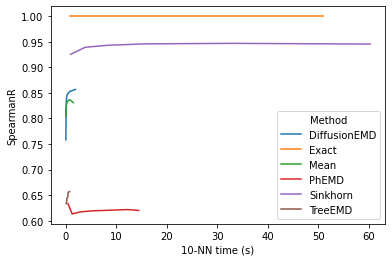

In [6]:
sns.lineplot(data=df_mean, x="10-NN time (s)", y="SpearmanR", hue="Method")

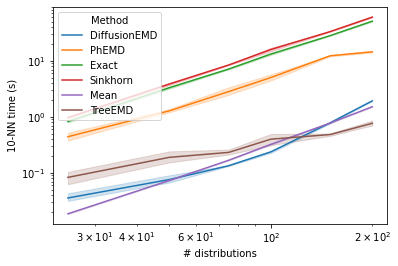

In [7]:
import matplotlib.pyplot as plt

sns.lineplot(data=df, x="# distributions", y="10-NN time (s)", hue="Method")
plt.xscale("log")
plt.yscale("log")

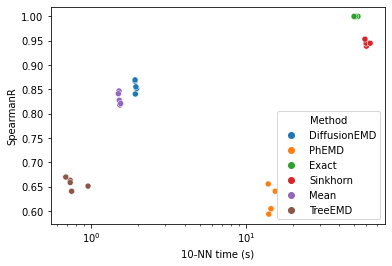

In [8]:
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df[df["# distributions"] == 200],
    x="10-NN time (s)",
    y="SpearmanR",
    hue="Method",
)
plt.xscale("log")

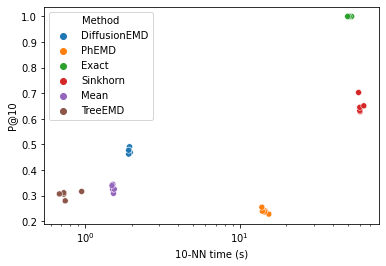

In [9]:
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df[df["# distributions"] == 200],
    x="10-NN time (s)",
    y="P@10",
    hue="Method",
)
plt.xscale("log")

In [17]:
df = pd.read_pickle(
    "../comparison/results_swiss_roll_20_10_[2, 3, 4, 5, 6, 7, 8]_[2, 3, 4, 5, 6, 7, 8]_[1, 4, 8, 16, 32, 64]_['kmeans']_0.0.3.pkl"
)

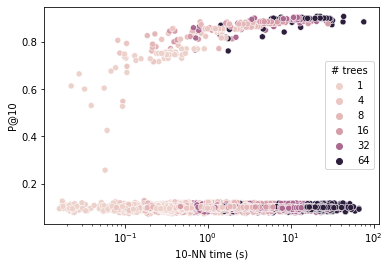

In [20]:
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df,
    x="10-NN time (s)",
    y="P@10",
    hue="# trees",
)
plt.xscale("log")

<AxesSubplot:xlabel='# trees', ylabel='P@10'>

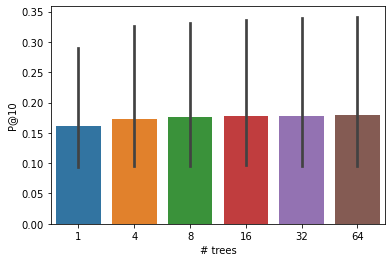

In [22]:
sns.barplot(
    data=df[(df["# Clusters"] == 4) & (df["# levels"] == 4)],
    x="# trees",
    y="P@10",
)

<AxesSubplot:xlabel='# Clusters', ylabel='P@50'>

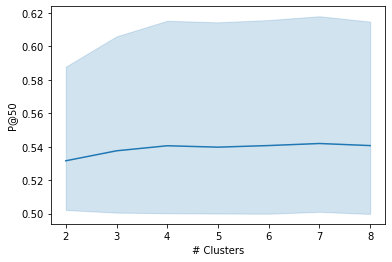

In [12]:
sns.lineplot(
    data=df[(df["# trees"] == 1) & (df["# levels"] == 4)],
    x="# Clusters",
    y="P@",
)

<AxesSubplot:xlabel='# levels', ylabel='P@1'>

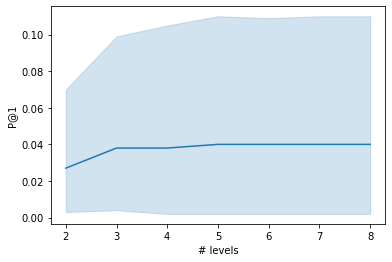

In [13]:
sns.lineplot(
    data=df[(df["# trees"] == 1) & (df["# Clusters"] == 4)],
    x="# levels",
    y="P@1",
)

In [14]:
df.sort_values("SpearmanR")

,Method,Seed,# distributions,# Neighbors,# Clusters,# levels,# trees,Clustering Method,SpearmanR,P@1,P@5,P@10,P@25,P@50,10-NN time (s),All-pairs time(s)
2430,TreeEMD,8,100,10,3,8,1,kmeans,-0.022008,0.02,0.050,0.096,0.2360,0.4910,0.442648,0.443241
2424,TreeEMD,8,100,10,3,7,1,kmeans,-0.022008,0.02,0.050,0.096,0.2360,0.4910,0.463199,0.463773
2418,TreeEMD,8,100,10,3,6,1,kmeans,-0.022008,0.02,0.050,0.096,0.2360,0.4910,0.458141,0.458767
2412,TreeEMD,8,100,10,3,5,1,kmeans,-0.020732,0.02,0.056,0.097,0.2388,0.4928,0.405219,0.405673
1806,TreeEMD,6,100,10,3,2,1,kmeans,-0.017072,0.01,0.048,0.119,0.2408,0.4882,0.030164,0.030239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,TreeEMD,0,100,10,5,5,64,kmeans,0.984141,0.77,0.870,0.907,0.9356,0.9520,22.417331,22.466797
161,TreeEMD,0,100,10,5,7,64,kmeans,0.984141,0.77,0.870,0.907,0.9356,0.9520,20.773370,20.823341
155,TreeEMD,0,100,10,5,6,64,kmeans,0.984141,0.77,0.870,0.907,0.9356,0.9520,20.780615,20.830655
167,TreeEMD,0,100,10,5,8,64,kmeans,0.984141,0.77,0.870,0.907,0.9356,0.9520,22.671101,22.720970


(array([2.646e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 1.900e+01, 2.690e+02]),
 array([-0.02200804,  0.07860694,  0.17922191,  0.27983689,  0.38045187,
         0.48106685,  0.58168182,  0.6822968 ,  0.78291178,  0.88352676,
         0.98414173]),
 <BarContainer object of 10 artists>)

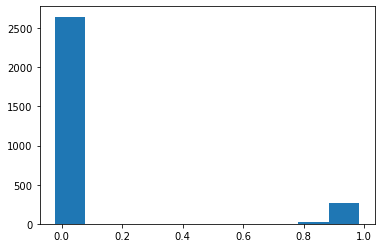

In [15]:
plt.hist(df["SpearmanR"])